<a href="https://colab.research.google.com/github/gustiagungdikse01/Data_Analitics/blob/main/UAS_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Gusti Agung Dikse Semadi 
NIM :19101230 
Prodi : TI-MDI 
Matkul : Data Analytics

Proses Running Sampel Codes dari penelitian yang dilakukan oleh SHUBAM SUMBRIA yang berjudul Clustering of Salaried Employees using k-Means yang saya download di halaman tersebut juga yaitu URL clustering.

Guna memenuhi salah satu Tugas untuk UAS dalam matakuliah Data Analitycs

running code disini menggunakan metode k-Means untuk pemodelan Clustering.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/uas"
# /content/gdrive/My Drive/uas is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/uas
#Check the present working directory using pwd command

/content/gdrive/My Drive/uas


In [ ]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 155644 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 5.9 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31646 sha256=6d948126cbf0a7b3cbf2d776da7bd60ccdcd3def2666f474dff53e66b87605ac
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 3.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 25.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 21.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 25.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 26.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 3.7 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m

Importing Required Libararies and Modules

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

In [ ]:
!kaggle kernels output shubamsumbria/clustering-of-salaried-employees-using-k-means -p /path/to/dest

Output file downloaded to /path/to/dest/__notebook_source__.ipynb
Kernel log downloaded to /path/to/dest/clustering-of-salaried-employees-using-k-means.log 


In [ ]:
ls

hyderabad-salaried-employees.csv  kaggle.json


Loading Dataset into Pandas' DataFrame

In [ ]:
df = pd.read_csv("hyderabad-salaried-employees.csv")
df.head()

,candidateName,companyName,designation,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,Category
0,Ruchismita Dash,Amdocs,Software Developer,2 Year(s) 1 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 6.71 lacs,HYDERABAD-SALARIED
1,MANISHA DAS,APOLLO HOSPITALS ENTERPRISES LIMITED,SENIOR EXECUTIVE-OPERATIONS,5 Year(s) 9 Month(s),Hyderabad/ Secunderabad,MBA/ PGDM,B.Pharm. (Pharmacy),Rs. 5.0 lacs,HYDERABAD-SALARIED
2,C J GEETHA PRIYA,propertyoneshop.com,System Administrator,4 Year(s) 4 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),NaN,Rs. 84.0 lacs,HYDERABAD-SALARIED
3,SRIKANTH,Axis Bank Ltd,NaN,7 Year(s) 11 Month(s),Hyderabad/ Secunderabad,NaN,MBA/ PGDM,Rs. 7.0 lacs,HYDERABAD-SALARIED
4,Madduri Srinivas,CTS,Associate Projects,6 Year(s) 8 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MCA/ PGDCA,Rs. 8.05 lacs,HYDERABAD-SALARIED


Data Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28847 entries, 0 to 28846
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   candidateName       28843 non-null  object
 1   companyName         28806 non-null  object
 2   designation         24217 non-null  object
 3   experienceMas       28847 non-null  object
 4   locationCurrentMas  28847 non-null  object
 5   qualificationMas    23971 non-null  object
 6   qualificationMas2   15449 non-null  object
 7   salary              28847 non-null  object
 8   Category            28847 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


In [ ]:
df.describe()

,candidateName,companyName,designation,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,Category
count,28843,28806,24217,28847,28847,23971,15449,28847,28847
unique,27288,15153,12636,492,3,51,48,1560,1
top,- -,Currently Unemployed,Currently Unemployed,10 Year(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),MBA/ PGDM,Rs. 6.0 lacs,HYDERABAD-SALARIED
freq,27,804,778,966,28841,8922,5448,1695,28847


**Data Cleaning**
Checking Missing Values in each Column

In [ ]:
df.isna().sum()

candidateName             4
companyName              41
designation            4630
experienceMas             0
locationCurrentMas        0
qualificationMas       4876
qualificationMas2     13398
salary                    0
Category                  0
dtype: int64

Checking Unique Values in each Column

In [ ]:
df.nunique()

candidateName         27288
companyName           15153
designation           12636
experienceMas           492
locationCurrentMas        3
qualificationMas         51
qualificationMas2        48
salary                 1560
Category                  1
dtype: int64

Checking Values in 'locationCurrentMas'

In [ ]:
df.locationCurrentMas.value_counts()

Hyderabad/ Secunderabad    28841
Hyderabad                      3
Hyderabad                      3
Name: locationCurrentMas, dtype: int64

Visualizing Missing Pattern in Dataset

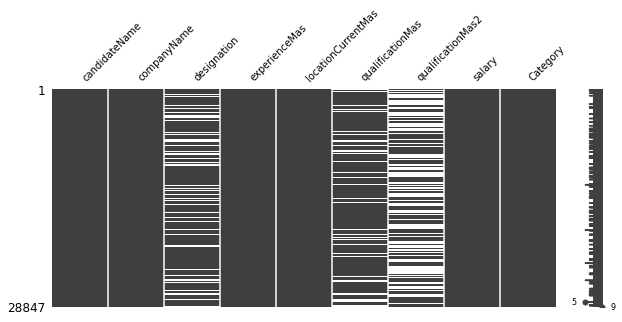

In [ ]:
msno.matrix(df, figsize=(10,4), fontsize=10)

Droping Rows from Some Columns containing NaN Values

In [ ]:
#Droping Rows from 'companyName' and 'designation' containing NaN values
df.dropna(axis=0, inplace=True, subset=['companyName', 'designation','candidateName','Category','locationCurrentMas'])

final = df.copy(deep=True) # Copying dataframe for final split in excel files

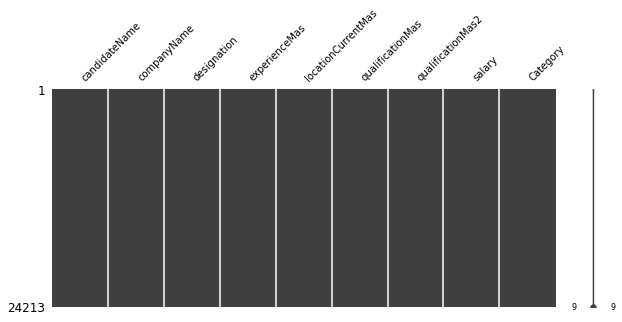

In [ ]:
#Replacing "NaN" Values in 'qualificationMas' and 'qualificationMas2' with "Missing" (str)
df['qualificationMas'].fillna(value='Missing', inplace=True)
df['qualificationMas2'].fillna(value='Missing', inplace=True)
msno.matrix(df, figsize=(10,4), fontsize=10)

Droping Irrelevant Columns

In [ ]:
# Droping Unwanted/Notrelevent Columns from dataFrame
df.drop(columns=['candidateName','Category','locationCurrentMas'], inplace=True)

Formatting Columns Data in Usable Form

In [ ]:
# Convert 'Rs. X Lakhs' [Object] in 'X'[float]
df['salary'] = df['salary'].astype('str')
df[df.columns[5]] = df[df.columns[5]].apply(lambda x: x.replace('Rs. ','')).apply(lambda x: x.replace(' lacs','')).astype(np.float64)

# Convert 'A Year(s) B Month(s)' [object] in Month(s) [float]
def process_exp(dataframe,colid):
    df['experienceMas'] = df['experienceMas'].astype('str') # from object type to str type [to use split fuunction]
    df['experienceMas'].replace('Fresher','0 Year(s) 0 Month(s)', inplace=True) #changing data in single format ['Fresher' = '0 Year(s) 0 Month(s)']
    for rowid in range(dataframe.shape[0]):
        element=dataframe.iloc[rowid,colid].split(' ') # Splitting str 'A Year(s) B Month(s)' from each row using space into ['A','Year(s)','B','Month(s)']
        if len(element)==4:
            year,month=(element[0],element[2]) # Getting A and B as no. of years and months
        else:
            year,month=(element[0],0) #if there is no month value then only take years
        dataframe.iloc[rowid,colid]=(12*float(year))+float(month) # multiply years with 12 and add months [to get no. of months of experience]
    dataframe.iloc[:,2]=pd.to_numeric(dataframe.experienceMas) # Convert str to float type
    return dataframe

df=process_exp(dataframe=df, colid=2)

#LabelEncoding
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])
df.head()

,companyName,designation,experienceMas,qualificationMas,qualificationMas2,salary
0,777,9365,25.0,15,43,6.71
1,265,7708,69.0,38,4,5.00
2,12683,10809,52.0,2,43,84.00
4,1928,1430,80.0,2,33,8.05
5,7180,10090,242.0,45,48,16.00


**Data Transformation**
Normalize Data to fit into Clustering Algorithmv

In [ ]:
data = pd.DataFrame(normalize(df,axis=0), columns=df.columns)
data.head()

,companyName,designation,experienceMas,qualificationMas,qualificationMas2,salary
0,0.000695,0.008324,0.001108,0.004041,0.007620,0.001818
1,0.000237,0.006851,0.003058,0.010237,0.000709,0.001355
2,0.011345,0.009607,0.002305,0.000539,0.007620,0.022758
3,0.001725,0.001271,0.003546,0.000539,0.005848,0.002181
4,0.006422,0.008968,0.010726,0.012123,0.008506,0.004335


**Data Reduction**
Checking Correlation Between Columns

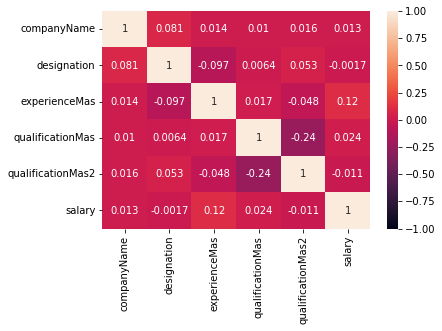

In [ ]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

Principal Component Analysis

In [ ]:
# define transform
pca = PCA(n_components=2)
# prepare transform on dataset
pca.fit(data)
# apply transform to dataset
data = pca.transform(data)

**Find Optimal Value of K**
Elbow Method

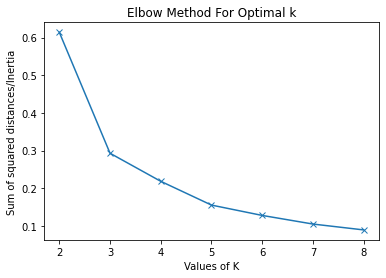

In [ ]:
Sum_of_squared_distances = []
K = range(2,9)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K,Sum_of_squared_distances,'x-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

Statistical Metrics for achieving optimal 'k'
Silhouette analysis

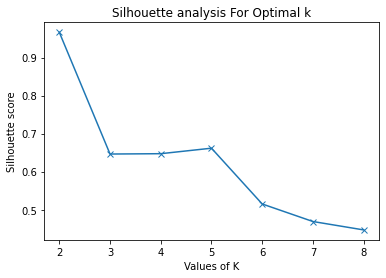

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(data, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'x-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

Calinski Harabasz Score

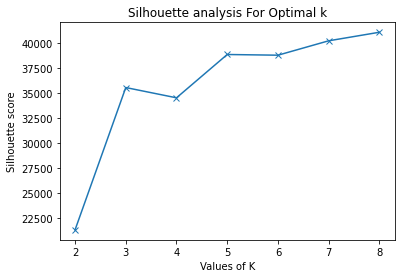

In [ ]:
range_n_clusters = range(2,9)
calinski_harabasz_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    # silhouette score
    calinski_harabasz_avg.append(calinski_harabasz_score(data, cluster_labels))

plt.plot(range_n_clusters,calinski_harabasz_avg,'x-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

Davies Bouldin Score

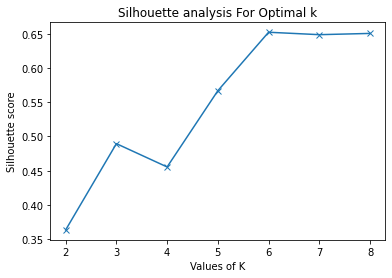

In [ ]:
range_n_clusters = range(2,9)
avies_bouldin_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    # silhouette score
    avies_bouldin_avg.append(davies_bouldin_score(data, cluster_labels))

plt.plot(range_n_clusters,avies_bouldin_avg,'x-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

**KMeans Clustering Algorithm**

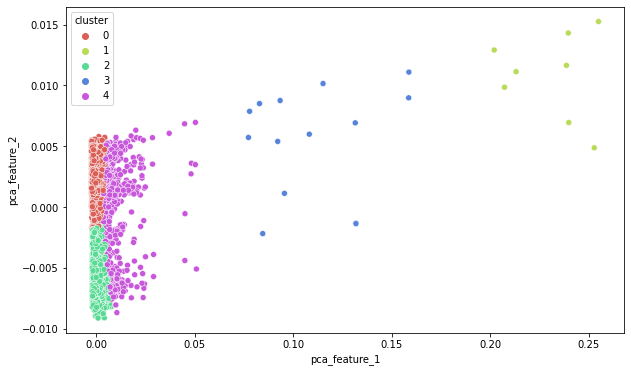

In [ ]:
clusters=5 #from above analysis for optimal value of k
kmeans = KMeans(n_clusters=clusters, init='k-means++')
kmeans.fit(data)
pred = kmeans.predict(data)
data = pd.DataFrame(data, columns = ['pca_feature_1','pca_feature_2']) # features selected by using PCA
data['cluster'] = pred

# Plot Showing Clusters using features [2] selected from PCA
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x=data.pca_feature_1, y=data.pca_feature_2, hue='cluster', palette=sns.color_palette("hls",clusters), legend="full")
plt.show()

**Final Data [Clusters Assigned]**

In [ ]:
final['cluster'] = pred
final = final.sort_values(by = 'cluster', ignore_index=True)
final.head()

,candidateName,companyName,designation,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,Category,cluster
0,Ruchismita Dash,Amdocs,Software Developer,2 Year(s) 1 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 6.71 lacs,HYDERABAD-SALARIED,0
1,Yamini Patil,Mascotspin Control,Technical Manager,6 Year(s) 9 Month(s),Hyderabad/ Secunderabad,B.Sc. (Science),M.Sc. (Science),Rs. 7.0 lacs,HYDERABAD-SALARIED,0
2,Vajra Mouli,Kotak Mahindra Bank,Branch Manager,15 Year(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MBA/ PGDM,Rs. 16.0 lacs,HYDERABAD-SALARIED,0
3,Chandra Mohan Muttamsetty,Star Health And Allied Insurance Co Ltd,MANAGER HOSPITAL RELATIONS AND NETWORK PROVIDER,5 Year(s) 4 Month(s),Hyderabad/ Secunderabad,BDS (Dental Surgery),NaN,Rs. 6.0 lacs,HYDERABAD-SALARIED,0
4,vasista rajesh,Valuelabs,Software Engineer,6 Year(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 8.0 lacs,HYDERABAD-SALARIED,0
